# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [2]:
df = pd.read_csv('iris_dataset.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

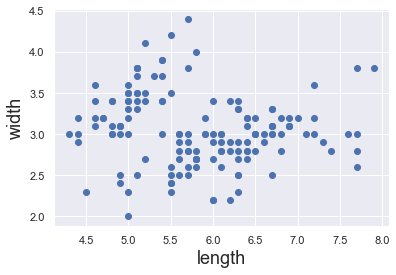

In [3]:
plt.scatter(df.sepal_length, df.sepal_width)
plt.ylabel('width', fontsize =18)
plt.xlabel('length', fontsize =18)
plt.show()

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [4]:
x = df.copy()

In [5]:
kmeans = KMeans(2)
kmeans.fit(x)


KMeans(n_clusters=2)

In [6]:
clusters = df.copy()
identified_cluster = kmeans.fit_predict(x)
clusters['cluster'] = identified_cluster

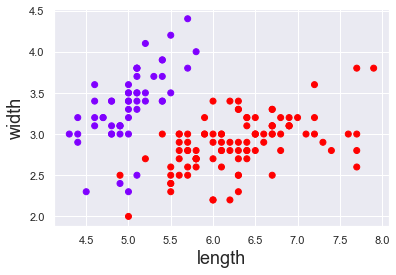

In [7]:
plt.scatter(clusters.sepal_length,clusters.sepal_width, c = clusters.cluster, cmap='rainbow')
plt.ylabel('width', fontsize =18)
plt.xlabel('length', fontsize =18)
plt.show()

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [8]:
from sklearn import preprocessing

In [9]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Clustering (scaled data)

In [11]:
kmeans = KMeans(2)
kmeans.fit(x_scaled)
identified_cluster = kmeans.fit_predict(x_scaled)
cluster_scaled = df.copy()
cluster_scaled['cluster'] = identified_cluster


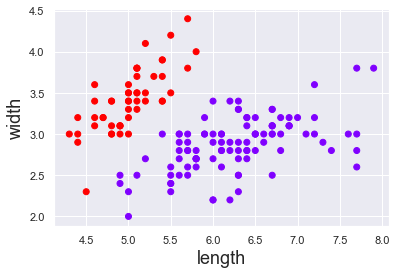

In [14]:

plt.scatter( cluster_scaled.sepal_length,cluster_scaled.sepal_width, c = cluster_scaled.cluster, cmap='rainbow')
plt.ylabel('width', fontsize =18)
plt.xlabel('length', fontsize =18)
plt.show()

## Take Advantage of the Elbow Method

### WCSS

In [15]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[600.0,
 223.73200573676345,
 140.96581663074699,
 114.39103978094067,
 91.06677122728537,
 80.65709769594946,
 72.116562329306,
 63.01085611519521,
 54.758972556375056,
 47.57239477137573]

### The Elbow Method

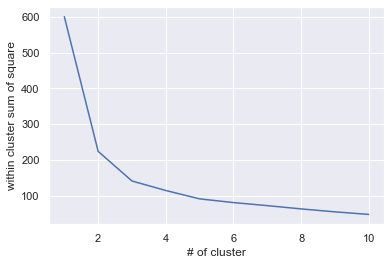

In [16]:
plt.plot(range(1,11), wcss)
plt.xlabel('# of cluster')
plt.ylabel('within cluster sum of square')
plt.show()

## Understanding the Elbow Curve

Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 2 clusters

Start by separating the standardized data into 2 clusters (you've already done that!)

In [20]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

cluster_2 = df.copy()
cluster_2['cluster'] = kmeans_2.fit_predict(x_scaled)

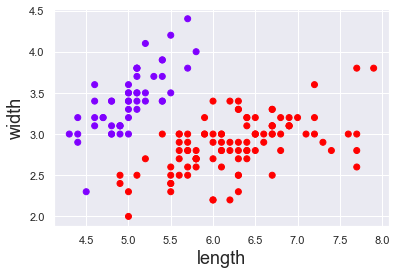

In [21]:

plt.scatter( cluster_2.sepal_length,cluster_2.sepal_width, c = cluster_2.cluster, cmap='rainbow')
plt.ylabel('width', fontsize =18)
plt.xlabel('length', fontsize =18)
plt.show()

## 3 Clusters

Redo the same for 3 and 5 clusters.

In [22]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

cluster_3 = df.copy()
cluster_3['cluster'] = kmeans_3.fit_predict(x_scaled)

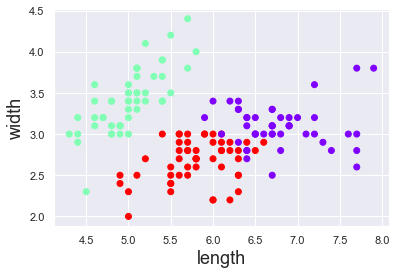

In [23]:

plt.scatter( cluster_3.sepal_length,cluster_3.sepal_width, c = cluster_3.cluster, cmap='rainbow')
plt.ylabel('width', fontsize =18)
plt.xlabel('length', fontsize =18)
plt.show()

## 5 Clusters

In [24]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

cluster_5 = df.copy()
cluster_5['cluster'] = kmeans_5.fit_predict(x_scaled)

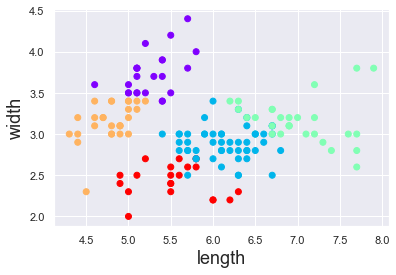

In [25]:

plt.scatter( cluster_5.sepal_length,cluster_5.sepal_width, c = cluster_5.cluster, cmap='rainbow')
plt.ylabel('width', fontsize =18)
plt.xlabel('length', fontsize =18)
plt.show()

## Compare your solutions to the original iris dataset

The original (full) iris data is located in <i>iris_with_answers.csv</i>. Load the csv, plot the data and compare it with your solution. 

Obviously there are only 3 species of Iris, because that's the original (truthful) iris dataset.

The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [26]:
real_data = pd.read_csv('iris_with_answers.csv')

In [28]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
real_data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [31]:
real_data['species']= real_data['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [32]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Scatter plots (which we will use for comparison)
#### 'Real data'
Looking at the first graph it seems like the clustering solution is much more intertwined than what we imagined (and what we found before)

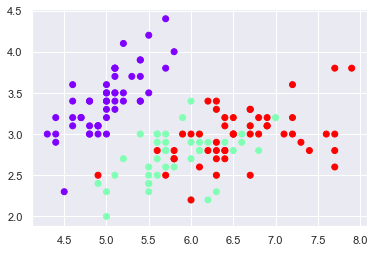

In [34]:
plt.scatter(real_data.sepal_length, real_data.sepal_width, c=real_data.species, cmap='rainbow')


Examining the other scatter plot (petal length vs petal width), we see that in fact the features which actually make the species different are petals and NOT sepals!

Note that 'real data' is the data observed in the real world (biological data)

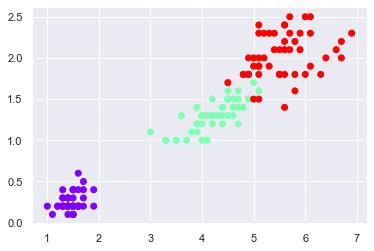

In [35]:
plt.scatter(real_data.petal_length, real_data.petal_width, c=real_data.species, cmap='rainbow')


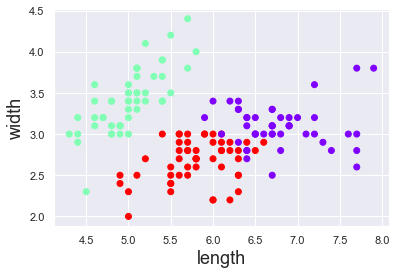

In [37]:

plt.scatter( cluster_3.sepal_length,cluster_3.sepal_width, c = cluster_3.cluster, cmap='rainbow')
plt.ylabel('width', fontsize =18)
plt.xlabel('length', fontsize =18)
plt.show()

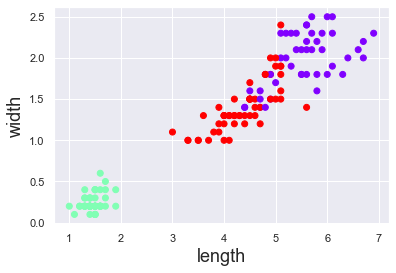

In [38]:

plt.scatter( cluster_3.petal_length,cluster_3.petal_width, c = cluster_3.cluster, cmap='rainbow')
plt.ylabel('width', fontsize =18)
plt.xlabel('length', fontsize =18)
plt.show()

Upon closer examination, it's evident that the original Iris dataset comprises three distinct sub-species of the Iris flower. Consequently, the logical choice for the number of clusters is 3.  

This observation brings to light the following points:  
  
The Elbow method, while a valuable heuristic, is not flawless, as it could potentially suggest alternative cluster numbers (e.g., 2 or 4).  
K-means proves particularly beneficial when the number of clusters is known in advance, as was the case here with the clear understanding that there are three sub-species.  
The intricacies of biology don't always conform to straightforward quantification through methods like k-means. Other approaches may prove more adept at capturing the nuances inherent in biological datasets.  